In [102]:
'''
Задача 1
В этом задании вам снова понадобится ваша виртуальная машина.
Напишите программу, которая подключается к вашей виртуальной машине по SSH и читает содержимое файла /etc/services. 
Далее, используя регулярные выражения, в данных, полученных из этого файла,
найдите все сетевые сервисы, использующие четырехзначные UDP-порты, начинающиеся с 5-ки. 
Выведите список этих сервисов.
'''
import sys
import paramiko
import re


password = #password

host = '192.168.56.101'
user = 'wiz'
port = 22

client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect(hostname=host, username=user, password=password, port=port)
stdin, stdout, stderr = client.exec_command('cat /etc/services')
data = stdout.read().decode('utf-8') + stderr.read().decode('utf-8')
all = re.findall('\w.*\D5\d{3}.*udp', data)
for i in all:
    i = i.replace('/udp', '')
    print(i)

rfe		5002
mmcc		5050
sip		5060
sip-tls		5061
aol		5190
xmpp-client	5222
xmpp-server	5269
cfengine	5308
mdns		5353
postgresql	5432
freeciv		5556
amqp		5672
ggz		5688
noclog		5354
hostmon		5355
rplay		5555


In [103]:
client.close()

In [112]:
'''
Задача 2
Напишите программу, которая подключается к вашей виртуальной машине по SSH и 
получает список всех установленных пакетов в системе. 
Из полученной таблицы создайте аналогичную в локальной базе данных sqlite3. Имя файла БД - ваша фамилия.
Из таблицы в БД получите список пакетов, имя которых начинается на букву r и содержит в номере версии слово ubuntu.
'''
import sys
import paramiko
import sqlite3
import pandas as pd
from pprint import pprint as pp

password = #passwrd

host = '192.168.56.101'
user = 'wiz'
port = 22

client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect(hostname=host, username=user, password=password, port=port)
stdin , stdout, stderr = client.exec_command('dpkg -l')
output = stdout.readlines()
print("\n".join(output))
con = sqlite3.connect('sobol.db')
c = con.cursor()
#    c.execute('CREATE TABLE new_table (Name, Status)')
for i in output:
    line = i.replace("install\n",'').replace("\t",'')
    sql = f"INSERT INTO new_table (Name) VALUES ('{line}')"
    c.execute(sql)
con.commit()
c.execute('select * from new_table')
pp(c.fetchall())

Desired=Unknown/Install/Remove/Purge/Hold

| Status=Not/Inst/Conf-files/Unpacked/halF-conf/Half-inst/trig-aWait/Trig-pend

|/ Err?=(none)/Reinst-required (Status,Err: uppercase=bad)

||/ Name                                  Version                                         Architecture Description

+++-=====================================-===============================================-============-===============================================================================

ii  accountsservice                       0.6.45-1ubuntu1                                 amd64        query and manipulate user account information

ii  acl                                   2.2.52-3build1                                  amd64        Access control list utilities

ii  acpid                                 1:2.0.28-1ubuntu1                               amd64        Advanced Configuration and Power Interface event daemon

ii  adduser                               3.116ubuntu1                   

OperationalError: near "releases": syntax error

In [5]:
'''
Задача 3
Используя pandas, прочитайте CSV-данные (http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv) в датафрейм. 
Определите среднее значение цены для всех платежей с Mastercard. Постройте графики цен для каждого типа платежного средства.
'''

import pandas as pd
import requests 

response = requests.get('http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv')
csv_data = response.text
with open('data.csv', 'w') as output_file:
    output_file.write(csv_data)
df = pd.read_csv('data.csv')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [11]:
df['Payment_Type'] = 'Mastercard'
res = df.groupby('Payment_Type')['Price'].mean()
res

Payment_Type
Mastercard    1622.367101
Name: Price, dtype: float64

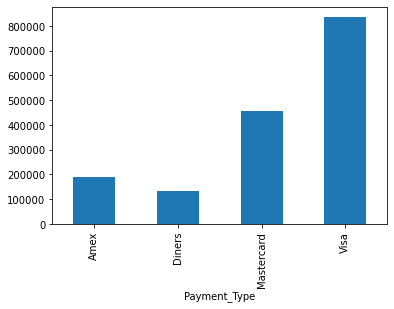

In [24]:
import matplotlib
res2 = df.groupby('Payment_Type')['Price'].sum()
res2.plot.bar()